# Scipy Tutorial
- Scientific Python
- https://docs.scipy.org/doc/scipy/reference/tutorial/

In [4]:
import scipy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
from scipy import linalg,optimize

## polynomials

In [4]:
from numpy import poly1d

In [5]:
p=poly1d([3,4,5])

In [6]:
p

poly1d([3, 4, 5])

In [7]:
print(p)

   2
3 x + 4 x + 5


In [8]:
print(p*p)

   4      3      2
9 x + 24 x + 46 x + 40 x + 25


### Derivative

In [9]:
print(p.deriv())

 
6 x + 4


### substute x

In [10]:
p([4,5])

array([ 69, 100])

## Vectorizing functions

In [16]:
def scalar(a,b):
    if(a>b):
        return a-b
    else:
        return a/b

In [17]:
scalar(10,5)

5

In [18]:
scalar(5,10)

0.5

In [19]:
scalar([1,2,3],[2,3,4])

TypeError: unsupported operand type(s) for /: 'list' and 'list'

In [20]:
scalar([2,3,4],[1,2,3])

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [21]:
vector=np.vectorize(scalar)

In [22]:
vector([1,2,3],[2,3,4]),vector([2,3,4],[1,2,3])

(array([0.5       , 0.66666667, 0.75      ]), array([1, 1, 1]))

### Note

### Other useful numpy functions

In [34]:
np.linspace(0,10,20),np.logspace(0,10,20)

(array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
         2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
         5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
         7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ]),
 array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
        1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
        1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
        2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
        2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]))

In [40]:
x=np.arange(10)
condlist=[x<3,x>5]
choicelist=[x,x*2]

In [41]:
np.select(condlist,choicelist)

array([ 0,  1,  2,  0,  0,  0, 12, 14, 16, 18])

# scipy.special 
- The main feature of the scipy.special package is the definition of numerous special functions of mathematical physics.
-  Includes airy, elliptic, bessel, gamma, beta, hypergeometric, parabolic cylinder, mathieu, spheroidal wave, struve, and kelvin

In [42]:
from scipy import special

In [43]:
help(special)

Help on package scipy.special in scipy:

NAME
    scipy.special

DESCRIPTION
    Special functions (:mod:`scipy.special`)
    
    .. currentmodule:: scipy.special
    
    Nearly all of the functions below are universal functions and follow
    broadcasting and automatic array-looping rules. Exceptions are
    noted.
    
    .. seealso::
    
       `scipy.special.cython_special` -- Typed Cython versions of special functions
    
    
    Error handling
    
    Errors are handled by returning NaNs or other appropriate values.
    Some of the special function routines can emit warnings or raise
    exceptions when an error occurs. By default this is disabled; to
    query and control the current error handling state the following
    functions are provided.
    
    .. autosummary::
       :toctree: generated/
    
       geterr                 -- Get the current way of handling special-function errors.
       seterr                 -- Set how special-function errors are handled.
   

In [44]:
y=lambda x:special.xlogy(x,x)
y(9)

19.775021196025975

In [45]:
help(scipy.special.xlogy)

Help on ufunc object:

xlogy = class ufunc(builtins.object)
 |  Functions that operate element by element on whole arrays.
 |  
 |  To see the documentation for a specific ufunc, use `info`.  For
 |  example, ``np.info(np.sin)``.  Because ufuncs are written in C
 |  (for speed) and linked into Python with NumPy's ufunc facility,
 |  Python's help() function finds this page whenever help() is called
 |  on a ufunc.
 |  
 |  A detailed explanation of ufuncs can be found in the docs for :ref:`ufuncs`.
 |  
 |  Calling ufuncs:
 |  ===============
 |  
 |  op(*x[, out], where=True, **kwargs)
 |  Apply `op` to the arguments `*x` elementwise, broadcasting the arguments.
 |  
 |  The broadcasting rules are:
 |  
 |  * Dimensions of length 1 may be prepended to either array.
 |  * Arrays may be repeated along dimensions of length 1.
 |  
 |  Parameters
 |  ----------
 |  *x : array_like
 |      Input arrays.
 |  out : ndarray, None, or tuple of ndarray and None, optional
 |      Alternate array

## scipy.integrate

In [46]:
from scipy import integrate

In [47]:
import scipy.integrate as integrate
import scipy.special as special

In [48]:
# integrating bessel function 2.5 along the interval 0,4.5
result=integrate.quad(lambda x:special.jv(2.5,x),0,4.5)

In [49]:
result

(1.1178179380783253, 7.866317250224184e-09)

In [50]:
from numpy import poly1d

In [51]:
eq=poly1d([1,-2,1])

In [52]:
print(eq)

   2
1 x - 2 x + 1


In [58]:
integrate.quad( eq,0,1)

(0.3333333333333333, 3.700743415417188e-15)

In [61]:
from math import sqrt
f = lambda x, y : 16*x*y
g = lambda x : 0
h = lambda y : sqrt(1-4*y**2)
i = scipy.integrate.dblquad(f, 0, 0.5, g, h)

In [62]:
i

(0.5, 1.7092350012594845e-14)

In [64]:
from scipy.integrate import quad
def integrand(x, a, b):
    return a*x**2 + b

I = quad(integrand, 0, 1, args=(1,2))
I

(2.3333333333333335, 2.590520390792032e-14)

In [85]:
from scipy.integrate import quad
def integrand(t,n,x):
    return np.exp(-x*t)/t**n
def expint(n,x):
    return quad(integrand,1,np.inf,args=(n,x))[0]
vec_expint=np.vectorize(expint)

vec_expint(3, np.arange(1.0,4.0,0.5))

array([0.10969197, 0.05673949, 0.03013338, 0.01629537, 0.00893065,
       0.00494538])

In [86]:
# same thing can be done with scipy.special.expn
special.expn(3,np.arange(1.0,4.0,0.5))

array([0.10969197, 0.05673949, 0.03013338, 0.01629537, 0.00893065,
       0.00494538])

## scipy.optimize

In [1]:
from scipy import optimize

## scipy.interpolate

In [28]:
from scipy.interpolate import interp1d

In [41]:
x=np.linspace(0,10,num=11,endpoint=True) #to see the char without interpolation as no of points increases no of output points increases and there is no point of precision as these are values at discrete points

In [37]:
y=np.cos(-x**2/9.0)

In [38]:
f=interp1d(x,y)
f2=interp1d(x,y,kind='cubic')
%matplotlib inline

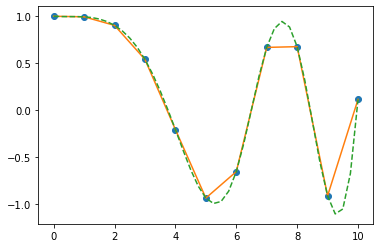

In [42]:
xnew=np.linspace(0,10,num=41,endpoint=True) # new values are there becuase to show the difference between scattered points without interpolation 
plt.plot(x,y,'o',xnew,f(xnew),'-',xnew,f2(xnew),'--')

## scipy.fftpack

In [49]:
from scipy.fftpack import fft, ifft

In [46]:
x=np.random.rand(1,5)

In [47]:
x

array([[0.61806755, 0.11736558, 0.10504468, 0.01307382, 0.59321869]])

In [52]:
y=fft(x)

In [53]:
y

array([[1.44677031+0.j        , 0.74209029+0.39850409j,
        0.07969342+0.36716893j, 0.07969342-0.36716893j,
        0.74209029-0.39850409j]])

In [54]:
ifft(y)

array([[0.61806755+0.j, 0.11736558+0.j, 0.10504468+0.j, 0.01307382+0.j,
        0.59321869+0.j]])

## scipy.signal

In [55]:
from scipy import signal

In [92]:
g=signal.gaussian(50,5.0) # 50 is no of points and 5.0 is standard deviation
# this gaussian is specially designed for dsp, so it is symmetric guassian window and mean will be at the median of input x
g.shape

(50,)

In [90]:
x=np.linspace(0,10,num=50,endpoint=True)

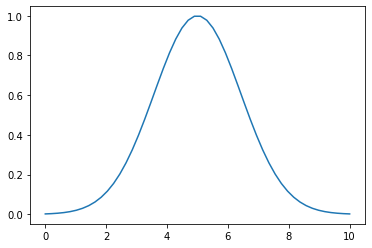

In [91]:
plt.plot(x,g)

### signal.convolve

In [93]:
signal.convolve(np.array([1,2,3,4]),np.array([4,3,2,1]))

array([ 4, 11, 20, 30, 20, 11,  4])

## scipy.linalg

In [1]:
import numpy as np

In [2]:
A=np.mat('[1,2;3,4]')

In [3]:
A.I

matrix([[-2. ,  1. ],
        [ 1.5, -0.5]])

In [4]:
A.T

matrix([[1, 3],
        [2, 4]])

In [5]:
b=np.arange(4).reshape(2,2)

In [7]:
A*b

matrix([[ 4,  7],
        [ 8, 15]])

In [8]:
from scipy import linalg

In [9]:
linalg.inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [10]:
A.dot(b)

matrix([[ 4,  7],
        [ 8, 15]])

### solving equations

In [11]:
# matrix form of equations
C=np.mat('[1,3,5;2,5,1;2,3,8]')

In [12]:
D=np.mat('[10;8;3]')

In [13]:
linalg.solve(C,D)

array([[-9.28],
       [ 5.16],
       [ 0.76]])

### Finding Determinant

In [14]:
linalg.det(A)

-2.0

In [28]:
C=[[1,2]]
from scipy import sparse
print(np.eye(3, k=1))

# Create a 2x2 identity matrix
print(np.mat(np.identity(2)))         

# Compressed Sparse Row matrix
print(sparse.csr_matrix(C))

# Compressed Sparse Column matrix
print(sparse.csc_matrix(C))

# Dictionary Of Keys matrix
print(sparse.dok_matrix(C))

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
[[1. 0.]
 [0. 1.]]
  (0, 0)	1
  (0, 1)	2
  (0, 0)	1
  (0, 1)	2
  (0, 0)	1
  (0, 1)	2


In [31]:
linalg.cosm(A)

array([[ 0.85542317, -0.11087638],
       [-0.16631457,  0.68910859]])

In [34]:
linalg.funm(A,lambda x:np.cos(x))`

array([[ 0.85542317, -0.11087638],
       [-0.16631457,  0.68910859]])

In [38]:
np.trace([[1,1],[0,3]])

4

In [42]:
np.linalg.matrix_rank(A)

2

### Eigen Values and Eigen Vectors

### SVD

In [52]:
E=np.random.rand(5,5)
u,sig,v=linalg.svd(E)
diag_sig=linalg.diagsvd(sig,5,5)
diag_sig

array([[2.89783344, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.87898452, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.75846519, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.55748865, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.23829298]])

### LU decomp or UV decomp

In [54]:
P,L,U=linalg.lu(E)
P,L,U

(array([[0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.]]),
 array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.22167938,  1.        ,  0.        ,  0.        ,  0.        ],
        [ 0.96917439,  0.28888401,  1.        ,  0.        ,  0.        ],
        [ 0.22436052,  0.1358114 , -0.19186502,  1.        ,  0.        ],
        [ 0.70678849,  0.35993844,  0.65040141, -0.60274502,  1.        ]]),
 array([[ 0.73336273,  0.71334803,  0.63013582,  0.32503465,  0.97442435],
        [ 0.        ,  0.7775737 ,  0.73490044,  0.39936755, -0.09009341],
        [ 0.        ,  0.        , -0.73319838,  0.49166369, -0.39247128],
        [ 0.        ,  0.        ,  0.        ,  0.80690192,  0.32272003],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.76073772]]))

### Least Squares

In [15]:
import matplotlib.pyplot as plt

In [16]:
i=np.r_[1:11]

In [17]:
i

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [18]:
xi=0.1*i

In [19]:
xi

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [56]:
c1,c2=5.0,2.0
# creating the output data values
yi=c1*np.exp(-xi)+c2*xi
# wantedly adding some random variation
zi = yi + 0.05 * np.max(yi) * np.random.randn(len(yi))
zi.shape

(10,)

In [62]:
# observe yi so we know the format of output
# in case of linear regression the format is y=ax+b
# then we need to feed this variable charachteristic
# i.e. llr telling which regression is that


A=np.c_[np.exp(-xi)[:,np.newaxis],xi[:,np.newaxis]]

# now I will do a linear reg for the same data and then plot it
B=np.c_[xi[:,np.newaxis],np.ones(xi.shape[0])[:,np.newaxis]]
B

array([[0.1, 1. ],
       [0.2, 1. ],
       [0.3, 1. ],
       [0.4, 1. ],
       [0.5, 1. ],
       [0.6, 1. ],
       [0.7, 1. ],
       [0.8, 1. ],
       [0.9, 1. ],
       [1. , 1. ]])

# This works on the equation
# Ax=B
# A is the equation type we want
# B is the matrix containing the data points or output points that we have.

In [60]:
linalg.lstsq(A,zi)

(array([4.77460203, 2.30129654]),
 0.37827758555832747,
 2,
 array([2.58763467, 1.02933937]))

In [63]:
linalg.lstsq(B,zi)

(array([-0.53005856,  4.42829901]),
 0.36566476381527135,
 2,
 array([3.63678979, 0.78978481]))

In [64]:
c,resid,rank,sigma=linalg.lstsq(A,zi)
res=linalg.lstsq(B,zi)

In [68]:
yi2=c[0]*np.exp(-xi)+c[1]*xi

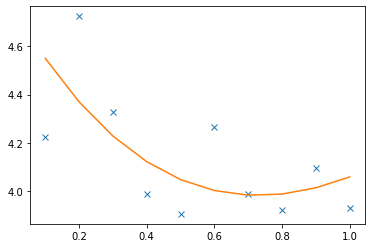

In [69]:
plt.plot(xi,zi,'x',xi,yi2)

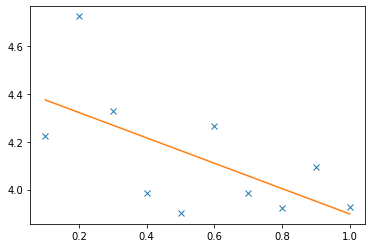

In [70]:
#if we apply linear reg then
lr=res[0][0]*xi+res[0][1]
plt.plot(xi,zi,'x',xi,lr)

In [71]:
linalg.pinv(A)

array([[ 0.4513091 ,  0.36486032,  0.28285826,  0.20487977,  0.13054196,
         0.05949836, -0.00856451, -0.0739303 , -0.13685567, -0.19757286],
       [-0.30436322, -0.21511271, -0.129117  , -0.04606635,  0.0343195 ,
         0.11229413,  0.188087  ,  0.26190574,  0.33393821,  0.40435439]])

In [74]:
linalg.pinv2(A)

array([[ 0.4513091 ,  0.36486032,  0.28285826,  0.20487977,  0.13054196,
         0.05949836, -0.00856451, -0.0739303 , -0.13685567, -0.19757286],
       [-0.30436322, -0.21511271, -0.129117  , -0.04606635,  0.0343195 ,
         0.11229413,  0.188087  ,  0.26190574,  0.33393821,  0.40435439]])

In [77]:
linalg.inv(A)

ValueError: expected square matrix

In [79]:
np.matrix(A).I

matrix([[ 0.4513091 ,  0.36486032,  0.28285826,  0.20487977,  0.13054196,
          0.05949836, -0.00856451, -0.0739303 , -0.13685567, -0.19757286],
        [-0.30436322, -0.21511271, -0.129117  , -0.04606635,  0.0343195 ,
          0.11229413,  0.188087  ,  0.26190574,  0.33393821,  0.40435439]])

## Decompositions

### Eigenvalues and Eigenvectors

In [81]:
A=np.array([[1,5,2],[2,4,1],[3,6,2]])
la,v=linalg.eig(A) #la- eigen values, v eigen vector

In [84]:
l1,l2,l3=la
print("Eigen Values ",l1,l2,l3)

Eigen Values  (7.957916204910748+0j) (-1.2576647056775332+0j) (0.2997485007667829+0j)


In [85]:
print("Eigen Vectors \n",v)

Eigen Vectors 
 [[-0.5297175  -0.90730751  0.28380519]
 [-0.44941741  0.28662547 -0.39012063]
 [-0.71932146  0.30763439  0.87593408]]


In [87]:
# returns only eigen values but not vectors
linalg.eigvals(A)

array([ 7.9579162 +0.j, -1.25766471+0.j,  0.2997485 +0.j])

### SVD

In [88]:
U,sig,Vh=linalg.svd(A)

In [89]:
U

array([[-0.54203505,  0.83667004, -0.07862088],
       [-0.45920051, -0.37324204, -0.80611741],
       [-0.7037989 , -0.40084114,  0.58650958]])

In [90]:
sig

array([9.91839161, 1.25185026, 0.24161707])

In [91]:
Vh

array([[-0.36012218, -0.88419283, -0.29751481],
       [-0.88855473,  0.22793076,  0.39814327],
       [ 0.28422264, -0.40773841,  0.86773664]])

In [92]:
diagsig=linalg.diagsvd(sig,3,3)

In [93]:
diagsig

array([[9.91839161, 0.        , 0.        ],
       [0.        , 1.25185026, 0.        ],
       [0.        , 0.        , 0.24161707]])

In [96]:
print(A,"\n\n")
U.dot(diagsig.dot(Vh)).astype(int)

[[1 5 2]
 [2 4 1]
 [3 6 2]] 




array([[1, 5, 2],
       [2, 4, 1],
       [3, 6, 2]])

## scipy.stats

### Random Variables

In [1]:
from scipy import stats

In [3]:
?stats.norm

In [6]:
from scipy.stats import norm

In [7]:
norm.a, norm.b #boundaries of distribution

(-inf, inf)

In [11]:
# GET ALL THE CONTINUOUS RANDOM VARIABLES
[d for d in dir(stats) if isinstance(getattr(stats,d),stats.rv_continuous)]
#Here d is a string, i.e. name of rv but not the exact attribute, so to get that we used getattr

['alpha',
 'anglit',
 'arcsine',
 'argus',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'crystalball',
 'dgamma',
 'dweibull',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'f',
 'fatiguelife',
 'fisk',
 'foldcauchy',
 'foldnorm',
 'frechet_l',
 'frechet_r',
 'gamma',
 'gausshyper',
 'genexpon',
 'genextreme',
 'gengamma',
 'genhalflogistic',
 'genlogistic',
 'gennorm',
 'genpareto',
 'gilbrat',
 'gompertz',
 'gumbel_l',
 'gumbel_r',
 'halfcauchy',
 'halfgennorm',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'invgamma',
 'invgauss',
 'invweibull',
 'johnsonsb',
 'johnsonsu',
 'kappa3',
 'kappa4',
 'ksone',
 'kstwobign',
 'laplace',
 'levy',
 'levy_l',
 'levy_stable',
 'loggamma',
 'logistic',
 'loglaplace',
 'lognorm',
 'lomax',
 'maxwell',
 'mielke',
 'moyal',
 'nakagami',
 'ncf',
 'nct',
 'ncx2',
 'norm',
 'norminvgauss',
 'pareto',
 'pearson3',
 'powerlaw',
 'powerlognorm',
 'powernorm',
 'rayleigh',
 'rdist',
 'rec

In [12]:
#Get all the discrete rvs
[d for d in dir(stats) if isinstance(getattr(stats,d),stats.rv_discrete)]


['bernoulli',
 'binom',
 'boltzmann',
 'dlaplace',
 'geom',
 'hypergeom',
 'logser',
 'nbinom',
 'planck',
 'poisson',
 'randint',
 'skellam',
 'yulesimon',
 'zipf']

## Common methods or public methods for Continuous RVs

- rvs (random variates)
- pdf (Probability Density Function)
- cdf (Cumulative Distribution Function)
- sf (Survival Function)
- ppf (Percent Point Function)
- isf (Inverse Survival Function)
- stats (mean, variance, skew, kurtosis)
- moment (non-central moments)

In [15]:
from scipy.stats import norm
import numpy as np

In [28]:
x=np.arange(-4,5)

In [29]:
x

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [30]:
norm.cdf(x)

array([3.16712418e-05, 1.34989803e-03, 2.27501319e-02, 1.58655254e-01,
       5.00000000e-01, 8.41344746e-01, 9.77249868e-01, 9.98650102e-01,
       9.99968329e-01])

In [41]:
# Gaussian with mean=0, std=1
norm.mean(),norm.std()

(0.0, 1.0)

In [44]:
mean,std=2,3
rv=norm(mean,std)
rv.mean(),rv.std()

(2.0, 3.0)

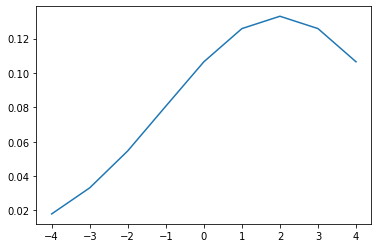

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x,rv.pdf(x))

In [51]:
# generate random variates of normal dist
from scipy.stats import norm
norm.rvs(size=5)

array([-0.37726455, -2.14777375, -1.44916032, -0.97256313,  0.96499132])

In [52]:
import numpy as np

In [53]:
x=np.random.randint(low=1,high=1000,size=10)

In [54]:
x

array([366, 471,  18,  14,  85,  96, 531, 893, 942, 954])

In [55]:
x.mean()

437.0

In [56]:
x.var()

133995.8

In [57]:
x.std()

366.0543675466801

In [58]:
x.min(),x.max()

(14, 954)

In [60]:
stats.mode(x)

ModeResult(mode=array([14]), count=array([1]))

# Left Over in Scipy
- one way anova; t-test 1,2; paired t-test

In [61]:
dir(stats)

['PearsonRConstantInputWarning',
 'PearsonRNearConstantInputWarning',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_hypotests',
 '_multivariate',
 '_rvs_sampling',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 'absolute_import',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'brunnermunzel',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_contingency',
 'chisquare',
 'circmean',
 'circstd',
 'circvar',
 'combine_pvalues',
 'contingency',
 'cosine',
 'crystalball',

In [63]:
# t-test 1
stats.ttest_1samp(x,14)

Ttest_1sampResult(statistic=3.4666981533506056, pvalue=0.007085556763566168)

In [67]:
# t-test independent
y=np.random.randint(low=1,high=100,size=10)
stats.ttest_ind(x,y),y,x

(Ttest_indResult(statistic=3.1604348182232354, pvalue=0.005413001116277812),
 array([24, 82, 26, 20, 97,  5, 95, 67, 28, 55]),
 array([366, 471,  18,  14,  85,  96, 531, 893, 942, 954]))

In [68]:
# paired t test or relative t test
stats.ttest_rel(x,y)

Ttest_relResult(statistic=3.2279325456787755, pvalue=0.010356895255783621)

In [70]:
# one way annova
z=np.random.randint(low=1,high=100,size=10)
stats.f_oneway(x,y,z)

F_onewayResult(statistic=9.612906089457738, pvalue=0.0007038326122972355)